In [1]:
%matplotlib inline

import os

import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append('../../..')

%load_ext autoreload
%autoreload 2

from computer_vision.yolov11.modules.detector import DetectionModel
from computer_vision.yolov11.parameter_parser import parser
from computer_vision.yolov11.utils.check import check_imgsz
from computer_vision.yolov11.data.utils import get_image_files
from computer_vision.yolov11.data.dataset import YOLODataset

In [3]:
data_dirpath=r'D:/data/ultralytics/coco128'

argument=f'''--root {data_dirpath} --image-dirname images/train2017 --label-dirname labels/train2017
--data-cfg ../coco128.yaml --hyperparam ../default.yaml '''
args=parser.parse_args(argument.split())

In [4]:
model=DetectionModel(cfg='../yolo11.yaml', ch=3)
print('stride ', model.stride)
gs = max(int(model.stride.max() if hasattr(model, "stride") else 32), 32)  # grid size (max stride)
print('grid size ', gs)
check_imgsz(args.imgsz, stride=gs, floor=gs, max_dim=1) # args.imgsz 

In BaseModel._predict_once max_idx -1 embed {-1}
stride  tensor([ 8., 16., 32.])
grid size  32


640

In [5]:
dataset=YOLODataset(img_path=os.path.join(args.root, args.image_dirname),label_path=os.path.join(args.root, args.label_dirname),
                    data=args.data_cfg, hyp=args.hyperparam, imgsz=640, cache=True, augment=True, rect=True, batch_size=8, stride=32, pad=0.5, 
                    single_cls=False, classes=None, fraction=1., channels=3)

print('dataset.im_files ', len(dataset.im_files))

Scanning D:\data\ultralytics\coco128\labels\train2017.cache ... 126 images with 2 missing and 0 empty files as well as 0 corrupt files
max_buffer_length  64  ni  128
dataset.im_files  128


In [6]:
import yaml
with open(args.hyperparam) as f: hyp=yaml.load(f, Loader=yaml.SafeLoader)
print(f'mosaic {hyp["mosaic"]} mixup {hyp["mixup"]} cutmix {hyp["cutmix"]}')

mosaic 1.0 mixup 0.0 cutmix 0.0


In [8]:
label=dataset.get_image_and_label(index=90)
print('label ', label.keys())

label  dict_keys(['im_file', 'cls', 'img', 'ori_shape', 'resized_shape', 'ratio_pad', 'rect_shape', 'instances'])


In [15]:
label['cls']

array([[16.],
       [29.]], dtype=float32)

['dog', 'frisbee']

img  (611, 640, 3) height 611, width 640


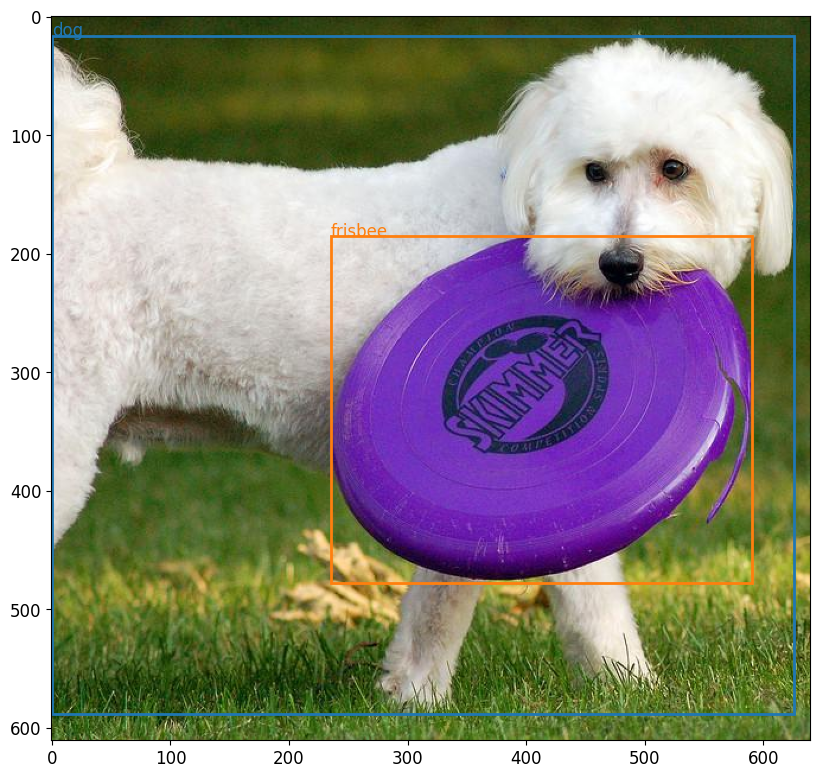

In [19]:
from computer_vision.yolov11.utils.ops import xywhn2xyxy, xywh2xyxy
from computer_vision.yolov11.data.utils import imread
from matplotlib import patches

classes=[dataset.data['names'][int(c)] for c in label['cls'].flatten()]
img=label['img']
height, width=img.shape[:2]
print('img ', img.shape, f'height {height}, width {width}')
boxes=xywhn2xyxy(np.copy(label['instances'].bboxes), w=width, h=height)

cmap = plt.get_cmap('tab10', 10)
plt.rcParams.update({'font.size'   : 12})

_, ax=plt.subplots(figsize=(8,8))
ax.imshow(img[...,::-1])
for j, (box,cls) in enumerate(zip(boxes, classes)):
    # Create a Rectangle patch
    rect = patches.Rectangle(box[:2], box[2]-box[0], box[3]-box[1], linewidth=2, edgecolor=cmap(j), facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    ax.text(*box[:2], f'{cls}', color=cmap(j), fontsize=12)
plt.tight_layout(pad=0, w_pad=0, h_pad=0)

img  (428, 640, 3) height 428, width 640


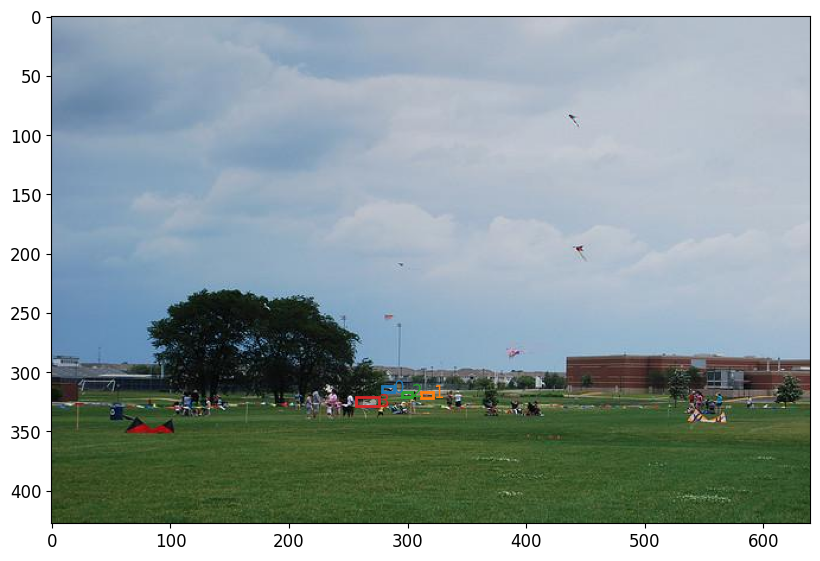

In [20]:
from computer_vision.yolov11.utils.ops import xywhn2xyxy, xywh2xyxy
from computer_vision.yolov11.data.utils import imread
from matplotlib import patches

item=dataset.labels[30]
img=imread(item['im_file'])
height, width=img.shape[:2]
print('img ', img.shape, f'height {height}, width {width}')
boxes=xywhn2xyxy(np.copy(item['bboxes']), w=width, h=height)

cmap = plt.get_cmap('tab10', 10)
plt.rcParams.update({'font.size'   : 12})

_, ax=plt.subplots(figsize=(8,8))
ax.imshow(img[...,::-1])
for j, box in enumerate(boxes):
    # Create a Rectangle patch
    rect = patches.Rectangle(box[:2], box[2]-box[0], box[3]-box[1], linewidth=2, edgecolor=cmap(j), facecolor='none')
    # Add the patch to the Axes
    ax.add_patch(rect)
    ax.text(*box[2:], f'{j}', color=cmap(j), fontsize=12)
plt.tight_layout(pad=0, w_pad=0, h_pad=0)

In [47]:
for i in item['cls'].flatten():
    print(dataset.data['names'][int(i)])

bowl
bowl
broccoli
bowl
orange
orange
orange
orange


In [25]:
boxes

array([[  0.      ,  50.119686, 608.9715  , 480.46973 ],
       [222.9757  , 162.88994 , 636.2615  , 628.0797  ]], dtype=float32)